# Road Edge Detection and Centerline Fitting
This notebook processes an image taken from a vehicle's perspective to:
1. Smooth the image to remove noise.
2. Detect road edges (both straight and curved).
3. Fit polynomials to the detected edges.
4. Compute and visualize a centerline between the edges.

The notebook is designed to handle both straight and curved roads.

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

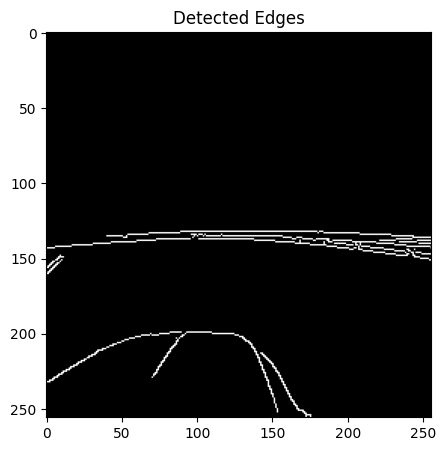

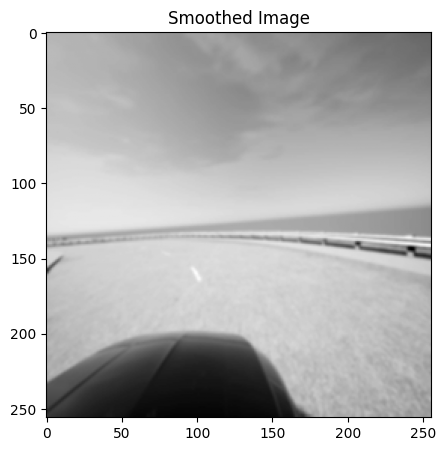

In [2]:
# Load image
i = 101
image = cv2.imread('data/' + str(i) + '.png')  # Replace with your filename
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
smoothed = cv2.GaussianBlur(gray, (3, 3), 0)

# Detect edges using Canny edge detection
edges = cv2.Canny(smoothed, 50, 150)

# Visualize the edges
plt.figure(figsize=(10, 5))
plt.title('Detected Edges')
plt.imshow(edges, cmap='gray')
plt.show()

# Smoothed image
plt.figure(figsize=(10, 5))
plt.title('Smoothed Image')
plt.imshow(smoothed, cmap='gray')
plt.show()

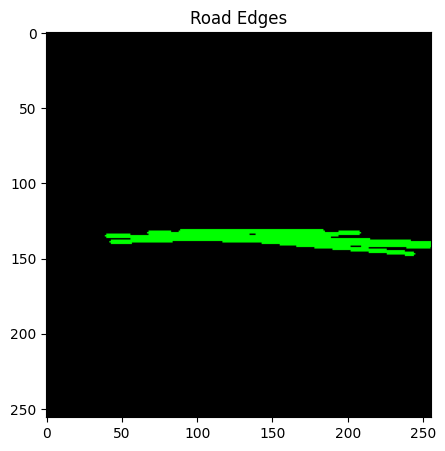

In [3]:
# Detect lines using probabilistic Hough transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=40, maxLineGap=200)

# Create visualization image
edges_visualization = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(edges_visualization, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.title('Road Edges')
plt.imshow(cv2.cvtColor(edges_visualization, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Split lines into left and right
left_x, left_y = [], []
right_x, right_y = [], []

image_center = image.shape[1] / 2

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2 - y1) / (x2 - x1 + 1e-6)
        if slope < 0 and x1 < image_center and x2 < image_center:
            left_x.extend([x1, x2])
            left_y.extend([y1, y2])
        elif slope > 0 and x1 > image_center and x2 > image_center:
            right_x.extend([x1, x2])
            right_y.extend([y1, y2])

# Fit polynomial curves (quadratic to handle curves)
def fit_poly(y, x):
    if len(x) > 0 and len(y) > 0:
        return np.polyfit(y, x, 2)  # Quadratic for curved roads
    return None

left_fit = fit_poly(left_y, left_x)
right_fit = fit_poly(right_y, right_x)

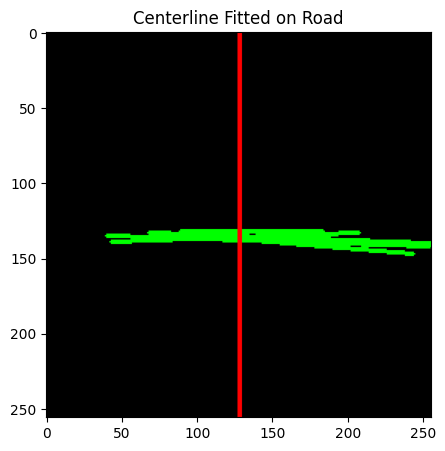

In [5]:
# Calculate centerline as average of left and right
def average_poly(y, left_fit, right_fit):
    if left_fit is not None and right_fit is not None:
        left_x = np.polyval(left_fit, y)
        right_x = np.polyval(right_fit, y)
        return (left_x + right_x) / 2
    elif left_fit is not None:
        return np.polyval(left_fit, y)
    elif right_fit is not None:
        return np.polyval(right_fit, y)
    else:
        return np.full_like(y, image.shape[1] // 2)

# Visualization with centerline
centerline_visualization = edges_visualization.copy()
y_vals = np.linspace(0, image.shape[0] - 1, image.shape[0])
center_x = average_poly(y_vals, left_fit, right_fit)

for i in range(1, len(y_vals)):
    cv2.line(centerline_visualization, 
             (int(center_x[i - 1]), int(y_vals[i - 1])), 
             (int(center_x[i]), int(y_vals[i])), 
             (0, 0, 255), 2)

# Display result
plt.figure(figsize=(10, 5))
plt.title('Centerline Fitted on Road')
plt.imshow(cv2.cvtColor(centerline_visualization, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('data/0.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


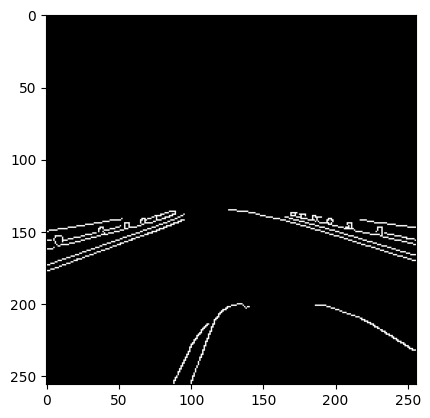

In [7]:
# Perform Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.show()

In [8]:
def region_of_interest(img):
    height, width = img.shape
    mask = np.zeros_like(img)

    # Define a triangular ROI (example)
    polygon = np.array([[
        (0, height),
        (width // 2, height // 2),
        (width, height),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    return cv2.bitwise_and(img, mask)

cropped_edges = region_of_interest(edges)

In [9]:
lines = cv2.HoughLinesP(cropped_edges, rho=1, theta=np.pi/180, threshold=50,
                        minLineLength=100, maxLineGap=50)
# Draw lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

TypeError: 'NoneType' object is not iterable

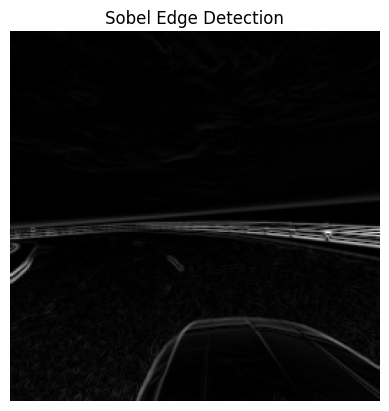

In [10]:
from skimage import filters
from skimage.io import imread
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('data/100.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (1, 1), 0)

image = imread('data/100.png', as_gray=True)
edges_sobel = filters.sobel(blurred)

plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


In [11]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('1.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


[ WARN:0@9.226] global loadsave.cpp:268 findDecoder imread_('1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
